# DIO - Análise de dados com Python e Pandas

In [15]:
import locale
import pandas as pd
import matplotlib.pyplot as plt

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [16]:
# Fonte: https://dados.gov.br/dataset/execucao-de-despesas-janeiro-2018
data = pd.read_csv('ifrr-despesas-janeiro-2018.csv', error_bad_lines=False, sep=";")

In [17]:
# Retirando colunas que não serão usadas
data = data.drop(["Ano e mês do lançamento", "Nome Órgão Superior", "Código Órgão Superior", "Código Órgão Subordinado", "Nome Órgão Subordinado", "Código Gestão", "Código Unidade Orçamentária"], axis = 1)

In [18]:
# Convertendo dados monetários

def convertCurrency(currency):
    currency = float(currency.replace(',', '.'))
    return f'{currency:.2f}'

for column in ('Valor Empenhado (R$)', 'Valor Liquidado (R$)', 'Valor Pago (R$)', 'Valor Restos a Pagar Inscritos (R$)', 'Valor Restos a Pagar Cancelado (R$)', 'Valor Restos a Pagar Pagos (R$)'):
    data[column] = data[column].astype(str)
    data[column] = data[column].apply(convertCurrency).astype(float)


## Teste de dados

In [19]:
# Verificando se existem dados nulos
data.isnull().sum()

Código Unidade Gestora                 0
Nome Unidade Gestora                   0
Nome Gestão                            0
Nome Unidade Orçamentária              0
Código Função                          0
Nome Função                            0
Código Subfução                        0
Nome Subfunção                         0
Código Programa Orçamentário           0
Nome Programa Orçamentário             0
Código Ação                            0
Nome Ação                              0
Código Programa Governo                0
Nome Programa Governo                  0
Código Grupo de Despesa                0
Nome Grupo de Despesa                  0
Código Elemento de Despesa             0
Nome Elemento de Despesa               0
Código Modalidade da Despesa           0
Modalidade da Despesa                  0
Valor Empenhado (R$)                   0
Valor Liquidado (R$)                   0
Valor Pago (R$)                        0
Valor Restos a Pagar Inscritos (R$)    0
Valor Restos a P

In [20]:
# Exibindo detalhes de cada coluna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Código Unidade Gestora               66 non-null     int64  
 1   Nome Unidade Gestora                 66 non-null     object 
 2   Nome Gestão                          66 non-null     object 
 3   Nome Unidade Orçamentária            66 non-null     object 
 4   Código Função                        66 non-null     int64  
 5   Nome Função                          66 non-null     object 
 6   Código Subfução                      66 non-null     int64  
 7   Nome Subfunção                       66 non-null     object 
 8   Código Programa Orçamentário         66 non-null     int64  
 9   Nome Programa Orçamentário           66 non-null     object 
 10  Código Ação                          66 non-null     object 
 11  Nome Ação                         

In [21]:
# Exibindo os primeiros registros da tabela
data.head()

,Código Unidade Gestora,Nome Unidade Gestora,Nome Gestão,Nome Unidade Orçamentária,Código Função,Nome Função,Código Subfução,Nome Subfunção,Código Programa Orçamentário,Nome Programa Orçamentário,...,Código Elemento de Despesa,Nome Elemento de Despesa,Código Modalidade da Despesa,Modalidade da Despesa,Valor Empenhado (R$),Valor Liquidado (R$),Valor Pago (R$),Valor Restos a Pagar Inscritos (R$),Valor Restos a Pagar Cancelado (R$),Valor Restos a Pagar Pagos (R$)
0,158350,INST.FED.RORAIMA - CAMPUS BOA VISTA,"INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA","INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA",12,EDUCACAO,363,ENSINO PROFISSIONAL,2080,EDUCACAO DE QUALIDADE PARA TODOS,...,18,AUXILIO FINANCEIRO A ESTUDANTES,90,APLICACOES DIRETAS,0.00,0.00,0.00,0.0,35781.20,0.00
1,158510,INST.FED.RORAIMA - CAMPUS AMAJARI,"INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA","INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA",12,EDUCACAO,363,ENSINO PROFISSIONAL,2080,EDUCACAO DE QUALIDADE PARA TODOS,...,14,DIARIAS - PESSOAL CIVIL,90,APLICACOES DIRETAS,0.00,0.00,0.00,0.0,58.66,0.00
2,158152,"INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA","INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA","INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA",12,EDUCACAO,363,ENSINO PROFISSIONAL,2109,PROGRAMA DE GESTAO E MANUTENCAO DO MINISTERIO ...,...,91,SENTENCAS JUDICIAIS,90,APLICACOES DIRETAS,12302.92,3075.73,3075.73,0.0,0.00,0.00
3,158152,"INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA","INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA","INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA",12,EDUCACAO,368,EDUCACAO BASICA,2030,EDUCACAO BASICA,...,39,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDIC,90,APLICACOES DIRETAS,0.00,0.00,0.00,0.0,25270.00,0.00
4,158350,INST.FED.RORAIMA - CAMPUS BOA VISTA,"INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA","INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA",12,EDUCACAO,363,ENSINO PROFISSIONAL,2080,EDUCACAO DE QUALIDADE PARA TODOS,...,39,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDIC,90,APLICACOES DIRETAS,8891.36,8882.71,8882.71,0.0,0.00,89401.11


In [22]:
# Exibindo a primeira ocorrencia da tabela
data.loc[0]

Código Unidade Gestora                                                            158350
Nome Unidade Gestora                                 INST.FED.RORAIMA - CAMPUS BOA VISTA
Nome Gestão                                     INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA
Nome Unidade Orçamentária                       INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA
Código Função                                                                         12
Nome Função                                                                     EDUCACAO
Código Subfução                                                                      363
Nome Subfunção                                                       ENSINO PROFISSIONAL
Código Programa Orçamentário                                                        2080
Nome Programa Orçamentário                              EDUCACAO DE QUALIDADE PARA TODOS
Código Ação                                                                         2994
Nome Ação            

## Análise para Negócio

In [23]:
# Valor total gasto em cada elemento de despesa.

valores = data.groupby("Nome Elemento de Despesa")["Valor Pago (R$)"].sum().sort_values(ascending=False)
valores["Valor Total"] = valores.sum()
valores.apply(lambda valor: locale.currency(valor, grouping=True, symbol=True))

Nome Elemento de Despesa
VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL    R$ 5.529.591,84
OBRIGACOES PATRONAIS - OP.INTRA-ORCAMENTARIAS    R$ 1.072.367,51
APOSENT.RPPS, RESER.REMUNER. E REFOR.MILITAR       R$ 871.201,73
AUXILIO-ALIMENTACAO                                R$ 310.836,24
INDENIZACOES E RESTITUICOES                        R$ 112.421,22
CONTRATACAO P/TEMPO DETERMINADO                     R$ 67.582,91
AUXILIO-TRANSPORTE                                  R$ 53.461,43
OUTRAS DESPESAS VARIAVEIS - PESSOAL CIVIL           R$ 52.364,91
OUTROS BENEF.ASSIST. DO SERVIDOR E DO MILITAR       R$ 52.061,50
PENSOES DO RPPS E DO MILITAR                        R$ 51.813,90
CONTRATACAO POR TEMPO DETERMINADO                   R$ 32.299,53
CONTRIB. A ENTIDADES FECHADAS DE PREVIDENCIA        R$ 12.501,42
OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDIC        R$ 8.882,71
SENTENCAS JUDICIAIS                                  R$ 3.075,73
LOCACAO DE MAO-DE-OBRA                               R$ 2.013,75


In [24]:
# Valor total empenhado em cada elemento de despesa.

valores = data.groupby("Nome Elemento de Despesa")["Valor Empenhado (R$)"].sum().sort_values(ascending=False)
valores["Valor Total"] = valores.sum()
valores.apply(lambda valor: locale.currency(valor, grouping=True, symbol=True))

Nome Elemento de Despesa
VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL    R$ 22.091.574,36
OBRIGACOES PATRONAIS - OP.INTRA-ORCAMENTARIAS     R$ 4.289.470,04
APOSENT.RPPS, RESER.REMUNER. E REFOR.MILITAR      R$ 2.613.605,19
AUXILIO-ALIMENTACAO                                 R$ 932.508,72
CONTRATACAO P/TEMPO DETERMINADO                     R$ 270.412,52
AUXILIO-TRANSPORTE                                  R$ 265.134,18
INDENIZACOES E RESTITUICOES                         R$ 247.475,38
OUTRAS DESPESAS VARIAVEIS - PESSOAL CIVIL           R$ 209.459,64
OUTROS BENEF.ASSIST. DO SERVIDOR E DO MILITAR       R$ 167.339,25
PENSOES DO RPPS E DO MILITAR                        R$ 155.441,70
CONTRATACAO POR TEMPO DETERMINADO                   R$ 117.082,52
CONTRIB. A ENTIDADES FECHADAS DE PREVIDENCIA         R$ 50.005,68
OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDIC        R$ 24.613,55
SENTENCAS JUDICIAIS                                  R$ 12.302,92
DIARIAS - PESSOAL CIVIL                            

In [25]:
# Quantidade de despesas
len(data["Nome Elemento de Despesa"].unique())

26

In [26]:
# PASSAGENS E DESPESAS COM LOCOMOCAO - Valor Pago

condicao = data["Nome Elemento de Despesa"] == "PASSAGENS E DESPESAS COM LOCOMOCAO"
valor = data.loc[condicao].groupby("Nome Elemento de Despesa")["Valor Pago (R$)"].sum()
locale.currency(float(valor), grouping=True, symbol=True)

'R$ 0,00'

In [27]:
# AUXILIO FINANCEIRO A ESTUDANTES - Valor Pago

condicao = data["Nome Elemento de Despesa"] == "AUXILIO FINANCEIRO A ESTUDANTES"
valor = data.loc[condicao].groupby("Nome Elemento de Despesa")["Valor Pago (R$)"].sum()
locale.currency(float(valor), grouping=True, symbol=True)

'R$ 0,00'

## Grafico dos Dados

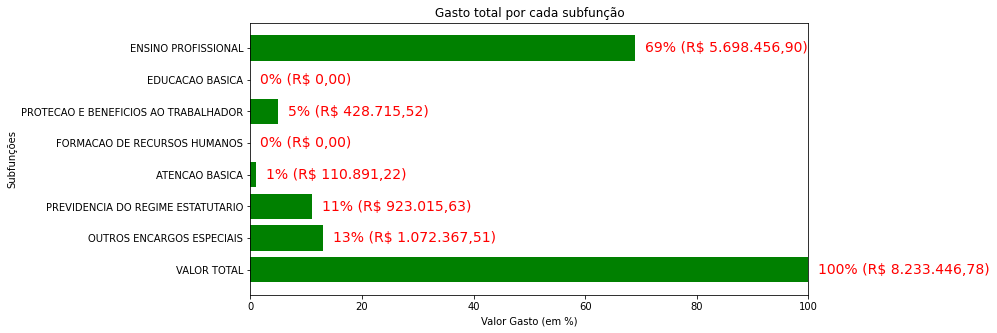

In [39]:
labels = 'ENSINO PROFISSIONAL', 'EDUCACAO BASICA', 'PROTECAO E BENEFICIOS AO TRABALHADOR', 'FORMACAO DE RECURSOS HUMANOS', 'ATENCAO BASICA', 'PREVIDENCIA DO REGIME ESTATUTARIO', 'OUTROS ENCARGOS ESPECIAIS', "VALOR TOTAL"

sizes = [
    float(data.loc[data["Nome Subfunção"] == "ENSINO PROFISSIONAL"].groupby("Nome Subfunção")["Valor Pago (R$)"].sum()),
    float(data.loc[data["Nome Subfunção"] == "EDUCACAO BASICA"].groupby("Nome Subfunção")["Valor Pago (R$)"].sum()), 
    float(data.loc[data["Nome Subfunção"] == "PROTECAO E BENEFICIOS AO TRABALHADOR"].groupby("Nome Subfunção")["Valor Pago (R$)"].sum()), 
    float(data.loc[data["Nome Subfunção"] == "FORMACAO DE RECURSOS HUMANOS"].groupby("Nome Subfunção")["Valor Pago (R$)"].sum()), 
    float(data.loc[data["Nome Subfunção"] == "ATENCAO BASICA"].groupby("Nome Subfunção")["Valor Pago (R$)"].sum()), 
    float(data.loc[data["Nome Subfunção"] == "PREVIDENCIA DO REGIME ESTATUTARIO"].groupby("Nome Subfunção")["Valor Pago (R$)"].sum()), 
    float(data.loc[data["Nome Subfunção"] == "OUTROS ENCARGOS ESPECIAIS"].groupby("Nome Subfunção")["Valor Pago (R$)"].sum())
]

total = sum(sizes)

sizespct = [
    int((sizes[0] / total) * 100),
    int((sizes[1] / total) * 100),
    int((sizes[2] / total) * 100),
    int((sizes[3] / total) * 100),
    int((sizes[4] / total) * 100),
    int((sizes[5] / total) * 100),
    int((sizes[6] / total) * 100),
    int(100) 
]

data1 = data.groupby("Nome Elemento de Despesa")["Valor Pago (R$)"].sum().sort_values(ascending=True)

fig, ax1 = plt.subplots()
fig.set_size_inches(10, 5)
hbars = ax1.barh(labels, sizespct, color='green')

ax1.set_ylabel('Subfunções')
ax1.set_xlabel('Valor Gasto (em %)')
ax1.set_title('Gasto total por cada subfunção')
ax1.set_xlim(0, 100)
ax1.invert_yaxis()
ax1.bar_label(hbars,
            labels=[
                f'{sizespct[0]}% ({locale.currency(sizes[0], grouping=True, symbol=True)})',
                f'{sizespct[1]}% ({locale.currency(sizes[1], grouping=True, symbol=True)})',
                f'{sizespct[2]}% ({locale.currency(sizes[2], grouping=True, symbol=True)})',
                f'{sizespct[3]}% ({locale.currency(sizes[3], grouping=True, symbol=True)})',
                f'{sizespct[4]}% ({locale.currency(sizes[4], grouping=True, symbol=True)})',
                f'{sizespct[5]}% ({locale.currency(sizes[5], grouping=True, symbol=True)})',
                f'{sizespct[6]}% ({locale.currency(sizes[6], grouping=True, symbol=True)})',
                f'{sizespct[7]}% ({locale.currency(total, grouping=True, symbol=True)})'
            ], 
            padding=10, 
            color='r', 
            fontsize=14
)

plt.show()

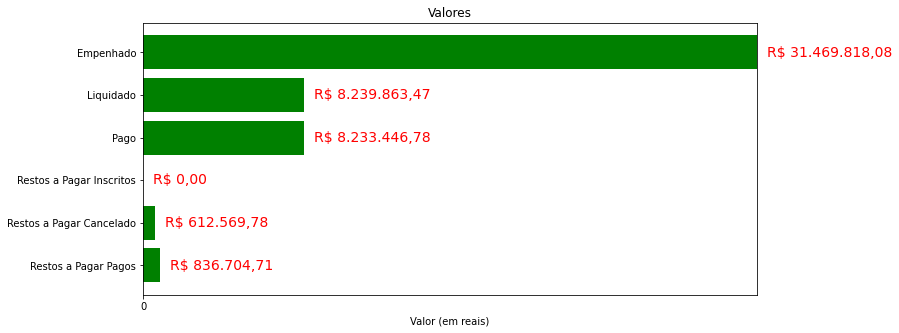

In [ ]:
labels = "Empenhado", "Liquidado", "Pago", "Restos a Pagar Inscritos", "Restos a Pagar Cancelado", "Restos a Pagar Pagos"
valor_total = [
    float(data["Valor Empenhado (R$)"].sum()),
    float(data["Valor Liquidado (R$)"].sum()),
    float(data["Valor Pago (R$)"].sum()),
    float(data["Valor Restos a Pagar Inscritos (R$)"].sum()),
    float(data["Valor Restos a Pagar Cancelado (R$)"].sum()),
    float(data["Valor Restos a Pagar Pagos (R$)"].sum())
]

fig2, ax2 = plt.subplots()
fig2.set_size_inches(11, 5)
hbars2 = ax2.barh(labels, valor_total, color='green')

ax2.set_xlabel('Valor (em reais)')
ax2.set_title('Valores')
ax2.set_xlim(0, 31469818.08)
ax2.set_xticks([0])
ax2.invert_yaxis()
ax2.bar_label(hbars2,
            labels=[
                locale.currency(valor_total[0], grouping=True, symbol=True),
                locale.currency(valor_total[1], grouping=True, symbol=True),
                locale.currency(valor_total[2], grouping=True, symbol=True),
                locale.currency(valor_total[3], grouping=True, symbol=True),
                locale.currency(valor_total[4], grouping=True, symbol=True),
                locale.currency(valor_total[5], grouping=True, symbol=True)
            ], 
            padding=10, 
            color='r', 
            fontsize=14
)

plt.show()